In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

 data   face-mask-dataset.zip  'kaggle (1).json'   sample_data


Importing dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3546.jpg', 'with_mask_659.jpg', 'with_mask_1628.jpg', 'with_mask_3460.jpg', 'with_mask_703.jpg']
['with_mask_2354.jpg', 'with_mask_1779.jpg', 'with_mask_429.jpg', 'with_mask_3422.jpg', 'with_mask_2739.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1117.jpg', 'without_mask_1866.jpg', 'without_mask_1090.jpg', 'without_mask_1309.jpg', 'without_mask_2641.jpg']
['without_mask_1644.jpg', 'without_mask_1966.jpg', 'without_mask_1773.jpg', 'without_mask_3160.jpg', 'without_mask_606.jpg']


In [ ]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**


with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels [0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

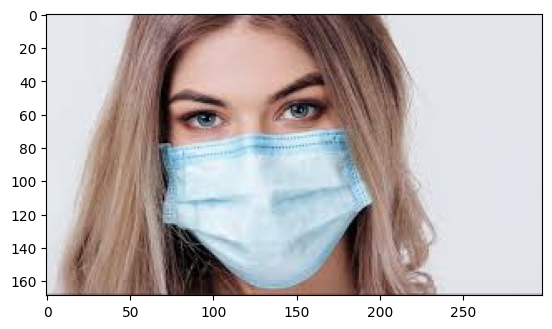

In [ ]:
#displaying with mask image
img=mpimg.imread('/content/data/with_mask/with_mask_2354.jpg')
imgplot=plt.imshow(img)
plt.show()

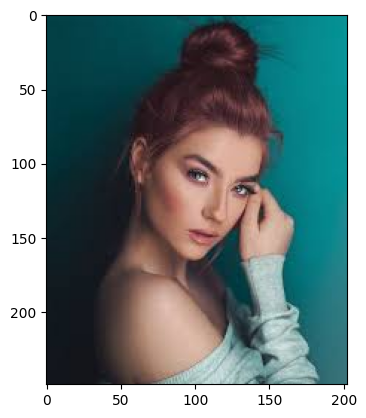

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1117.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1.Resize the images
2.convert the images to numpy arrays

In [ ]:
#convert images to numpy arrays
with_mask_path='/content/data/with_mask/'
data=[]  # Initialize data list

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

# Process images without masks, appending to the existing data list
without_mask_path='/content/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[234, 233, 238],
        [234, 233, 238],
        [234, 233, 238],
        ...,
        [238, 238, 240],
        [238, 238, 240],
        [238, 238, 240]],

       [[234, 233, 238],
        [234, 233, 238],
        [234, 233, 238],
        ...,
        [238, 238, 240],
        [238, 238, 240],
        [238, 238, 240]],

       [[234, 233, 238],
        [234, 233, 238],
        [234, 233, 238],
        ...,
        [238, 238, 240],
        [238, 238, 240],
        [238, 238, 240]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
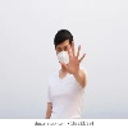

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#converting image list and label list to numpy array
X=np.array(data)
y=np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
X.shape

(7553, 128, 128, 3)

In [ ]:
y.shape

(7553,)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

**Train test split**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X.shape

(7553, 128, 128, 3)

In [ ]:
X_train.shape

(6042, 128, 128, 3)

In [ ]:
X_test.shape

(1511, 128, 128, 3)

In [ ]:
#scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

array([[[ 88,  30,  26],
        [ 96,  37,  34],
        [103,  44,  42],
        ...,
        [ 15,  16,  23],
        [ 15,  16,  21],
        [ 16,  17,  22]],

       [[ 93,  31,  26],
        [102,  41,  38],
        [108,  47,  46],
        ...,
        [ 16,  16,  24],
        [ 13,  13,  21],
        [ 15,  16,  21]],

       [[109,  43,  39],
        [119,  54,  50],
        [124,  59,  58],
        ...,
        [ 20,  20,  28],
        [ 19,  19,  27],
        [ 18,  18,  26]],

       ...,

       [[172,  60,  59],
        [174,  62,  62],
        [172,  64,  64],
        ...,
        [141, 105,  92],
        [143, 107,  93],
        [144, 108,  94]],

       [[172,  61,  59],
        [174,  64,  63],
        [171,  64,  62],
        ...,
        [140, 107,  93],
        [142, 109,  94],
        [145, 109,  93]],

       [[175,  64,  62],
        [177,  68,  65],
        [173,  65,  63],
        ...,
        [142, 109,  95],
        [144, 111,  96],
        [145, 112,  95]]], dtype=uint8)
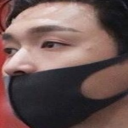

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.34509804, 0.11764706, 0.10196078],
        [0.37647059, 0.14509804, 0.13333333],
        [0.40392157, 0.17254902, 0.16470588],
        ...,
        [0.05882353, 0.0627451 , 0.09019608],
        [0.05882353, 0.0627451 , 0.08235294],
        [0.0627451 , 0.06666667, 0.08627451]],

       [[0.36470588, 0.12156863, 0.10196078],
        [0.4       , 0.16078431, 0.14901961],
        [0.42352941, 0.18431373, 0.18039216],
        ...,
        [0.0627451 , 0.0627451 , 0.09411765],
        [0.05098039, 0.05098039, 0.08235294],
        [0.05882353, 0.0627451 , 0.08235294]],

       [[0.42745098, 0.16862745, 0.15294118],
        [0.46666667, 0.21176471, 0.19607843],
        [0.48627451, 0.23137255, 0.22745098],
        ...,
        [0.07843137, 0.07843137, 0.10980392],
        [0.0745098 , 0.0745098 , 0.10588235],
        [0.07058824, 0.07058824, 0.10196078]],

       ...,

       [[0.6745098 , 0.23529412, 0.23137255],
        [0.68235294, 0.24313725, 0.24313725],
        [0.6745098 , 0

**Building a convolutional neural network**

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
 #training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - acc: 0.6735 - loss: 0.7959 - val_acc: 0.8992 - val_loss: 0.2730
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8779 - loss: 0.3172 - val_acc: 0.9025 - val_loss: 0.2492
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8931 - loss: 0.2725 - val_acc: 0.8975 - val_loss: 0.2443
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9079 - loss: 0.2348 - val_acc: 0.9190 - val_loss: 0.1964
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9158 - loss: 0.2214 - val_acc: 0.9256 - val_loss: 0.1940


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9038 - loss: 0.2149
Test Accuracy = 0.9040370583534241


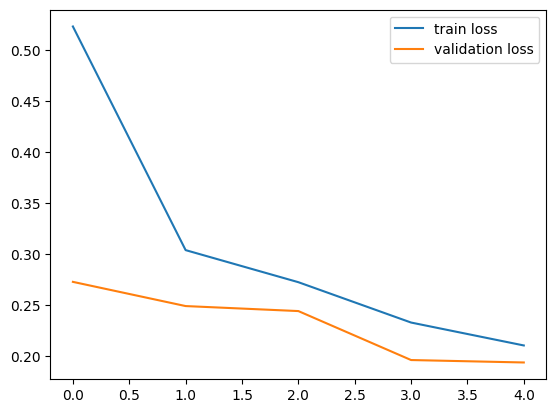

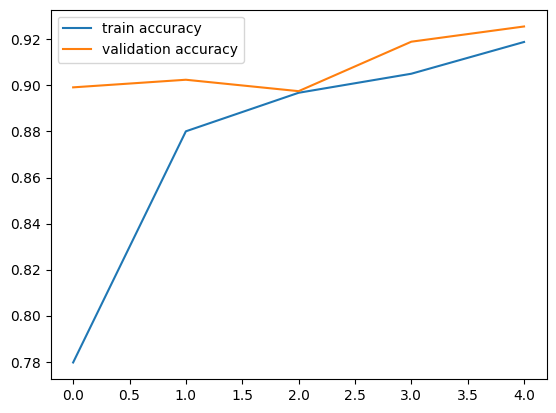

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test.jpg


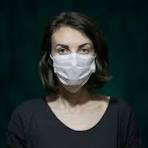

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
[[0.38968456 0.5773665 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')